In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utilix
import numpy as np
from tqdm import tqdm
import os
path_start = '/dali/lgrandi/rucio/xnt_'

In [2]:
import cutax
st = cutax.contexts.xenonnt_online()
runs = st.select_runs()
modes = set(runs["mode"])

You specified _auto_append_rucio_local=True and you are not on dali compute nodes,so we will add the following rucio local path:  /project/lgrandi/rucio/


Checking data availability: 0it [00:00, ?it/s]

Checking data availability:   0%|          | 0/2 [00:00<?, ?it/s]

/cvmfs/xenon.opensciencegrid.org/releases/nT/development/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/straxen/url_config.py:707: FutureWarning: From straxen version 2.1.0 onward, URLConfig parameters will be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn("From straxen version 2.1.0 onward, URLConfig parameters will be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.", FutureWarning)


In [57]:
modes_list = list(modes)

In [4]:
runs_dtype = np.dtype([('number', np.int32), 
                       ('mode', 'O'),
                       ('bad', np.bool),
                       ('messy', np.bool),
                       ('hot_spot', np.bool),
                       ('ramp_down', np.bool),
                       ('ramp_up', np.bool),
                       ('pmt_trip', np.bool),
                       ('rn220_fast_alphas', np.bool),
                       ('after_rn220', np.bool),
                       ('abandon', np.bool),
                       ('RAD_commissioning', np.bool)])
runs = np.zeros(sr1_right, dtype = runs_dtype)

/tmp/jobs/28626149/ipykernel_197/2426997777.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('bad', np.bool),
/tmp/jobs/28626149/ipykernel_197/2426997777.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('messy', np.bool),
/tmp/jobs/28626149/ipykernel_197/2426997777.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `b

In [5]:
import pymongo
from utilix import xent_collection
coll = xent_collection()

for i in tqdm(range(sr1_right)):
    query = {'number': i}
    doc = coll.find_one(query)
    runs[i]['number'] = i
    runs[i]['mode'] = doc['mode']
    try:
        tags = doc['tags']
        for t in tags:
            if t['name'] == 'bad':
                runs[i]['bad'] = True
            elif t['name'] == 'messy':
                runs[i]['messy'] = True
            elif t['name'] == 'hot_spot':
                runs[i]['hot_spot'] = True
            elif t['name'] == 'ramp_down':
                runs[i]['ramp_down'] = True
            elif t['name'] == 'ramp_up':
                runs[i]['ramp_up'] = True            
            elif t['name'] == 'pmt_trip':
                runs[i]['pmt_trip'] = True
            elif t['name'] == 'rn220_fast_alphas':
                runs[i]['rn220_fast_alphas'] = True
            elif t['name'] == 'after_rn220':
                runs[i]['after_rn220'] = True
            elif t['name'] == 'abandon':
                runs[i]['abandon'] = True
            elif t['name'] == 'RAD_commissioning':
                runs[i]['RAD_commissioning'] = True
    except:
        pass

100%|██████████| 53000/53000 [02:29<00:00, 353.64it/s]


In [6]:
for i in range(20):
    if i == 0:
        rules_info = np.load('/project2/lgrandi/yuanlq/shared/dali_cleanup/rucio_20230628_all_rules0.npy', 
                             allow_pickle=True)
    else:
        new = np.load('/project2/lgrandi/yuanlq/shared/dali_cleanup/rucio_20230628_all_rules%s.npy'%(i), 
                      allow_pickle=True)
        rules_info = np.concatenate((rules_info, new))

In [8]:
rules_info = rules_info[rules_info['UC_OSG_USERDISK']]

In [10]:
runids = rules_info['runid'].astype(np.int32)

In [13]:
interested_dtypes = ['raw_records_mv', 'raw_records_nv', 'raw_records_he', 'raw_records', 'records']

In [14]:
all_dtypes = np.unique(rules_info['data_type'])
names = []
sizes_gb = []
for dt in all_dtypes:
    selected = rules_info[rules_info['data_type']==dt]
    names.append(dt)
    sizes_gb.append(selected['size_gb'].sum())
names = np.array(names)
sizes_gb = np.array(sizes_gb)
argsort = sizes_gb.argsort()
names_sort = names[argsort]
sizes_gb_sort = sizes_gb[argsort]
for i in range(len(names)):
    print(names_sort[i], int(sizes_gb_sort[i]/1024), 'TB')

peaklet_classification_he 0 TB
peak_basics_he 0 TB
event_info_double 0 TB
online_peak_monitor 0 TB
online_event_monitor 0 TB
merged_s2s_he 0 TB
distinct_channels 0 TB
energy_estimates 0 TB
veto_regions 0 TB
events_mv 0 TB
records 0 TB
events 0 TB
events_nv 0 TB
hitlets_mv 0 TB
lone_raw_record_statistics_nv 0 TB
event_posrec_many 0 TB
corrected_areas 0 TB
pulse_counts 0 TB
event_positions 0 TB
raw_records_aqmon 0 TB
raw_records_lowgain 0 TB
peak_positions_cnn 0 TB
peak_positions_gcn 0 TB
peak_positions_mlp 0 TB
raw_records_aqmon_nv 0 TB
event_basics 0 TB
peaklet_classification 0 TB
raw_records_aux_mv 0 TB
event_info 0 TB
peak_proximity 0 TB
merged_s2s 0 TB
hitlets_nv 0 TB
peak_basics 0 TB
peaklets 2 TB
lone_hits 3 TB
raw_records_he 9 TB
raw_records_mv 17 TB
raw_records_nv 252 TB
raw_records 736 TB


In [15]:
def size_vs_runs(rules, runid_min=0, runid_max=sr1_right, nbins=100):
    runids = rules['runid'].astype(np.int32)
    bins_bound = np.linspace(runid_min, runid_max, nbins+1)
    sizes_tb = np.zeros(nbins)
    for b in range(nbins):
        selected_mask = runids>=bins_bound[b]
        selected_mask &= runids<=bins_bound[b+1]
        rules_selected = rules[selected_mask]
        if len(rules_selected):
            sizes_tb[b] = np.sum(rules_selected['size_gb']/1024)
    
    cum_sizes_tb = np.cumsum(sizes_tb)
    return cum_sizes_tb

In [16]:
def filter_out_rad(rules, runs):
    is_rad = np.zeros(len(rules), np.bool)
    for i,r in enumerate(rules):
        if runs[int(r['runid'])]['RAD_commissioning']:
            is_rad[i] = True
    return rules[~is_rad]

In [17]:
def find_with_tags(rules, runs, tags):
    tagged = np.zeros(len(rules), np.bool)
    for i,r in enumerate(rules):
        for t in tags:
            if runs[int(r['runid'])][t]:
                tagged[i] = True
    print(np.sum(tagged))
    return rules[tagged]

In [18]:
def find_with_mode(rules, runs, mode):
    is_mode = np.zeros(len(rules), np.bool)
    for i,r in enumerate(rules):
        if runs[int(r['runid'])]['mode'] == mode:
            is_mode[i] = True
    print(np.sum(is_mode))
    return rules[is_mode]

In [19]:
cum_sizes_tb_rr = size_vs_runs(rules_info[(rules_info['data_type']=='raw_records')])
cum_sizes_tb_rrhe = size_vs_runs(rules_info[rules_info['data_type']=='raw_records_he'])
cum_sizes_tb_rrmv = size_vs_runs(rules_info[rules_info['data_type']=='raw_records_mv'])
cum_sizes_tb_rrnv = size_vs_runs(rules_info[rules_info['data_type']=='raw_records_nv'])
cum_sizes_tb_pkl = size_vs_runs(rules_info[rules_info['data_type']=='peaklets'])
cum_sizes_tb_r = size_vs_runs(rules_info[rules_info['data_type']=='records'])

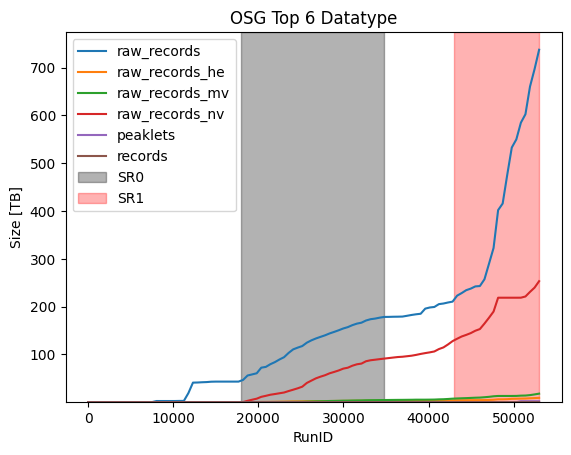

In [20]:
plt.figure(dpi=100)
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rr, label='raw_records')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrhe, label='raw_records_he')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrmv, label='raw_records_mv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrnv, label='raw_records_nv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_pkl, label='peaklets')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_r, label='records')
plt.xlabel('RunID')
plt.title('OSG Top 6 Datatype')
plt.ylabel('Size [TB]')
plt.axvspan(sr0_left, sr0_right, alpha=0.3, color='k', label='SR0')
plt.axvspan(sr1_left, sr1_right, alpha=0.3, color='r', label='SR1')
#plt.yscale('log')
plt.gca().set_ylim(bottom=1)
plt.legend()

In [21]:
rules_info_norad = filter_out_rad(rules=rules_info, runs=runs)

/tmp/jobs/28626149/ipykernel_197/441504338.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_rad = np.zeros(len(rules), np.bool)


In [22]:
cum_sizes_tb_rr_norad = size_vs_runs(rules_info_norad[(rules_info_norad['data_type']=='raw_records')])
cum_sizes_tb_rrhe_norad = size_vs_runs(rules_info_norad[rules_info_norad['data_type']=='raw_records_he'])
cum_sizes_tb_rrmv_norad = size_vs_runs(rules_info_norad[rules_info_norad['data_type']=='raw_records_mv'])
cum_sizes_tb_rrnv_norad = size_vs_runs(rules_info_norad[rules_info_norad['data_type']=='raw_records_nv'])
cum_sizes_tb_pkl_norad = size_vs_runs(rules_info_norad[rules_info_norad['data_type']=='peaklets'])
cum_sizes_tb_r_norad = size_vs_runs(rules_info_norad[rules_info_norad['data_type']=='records'])

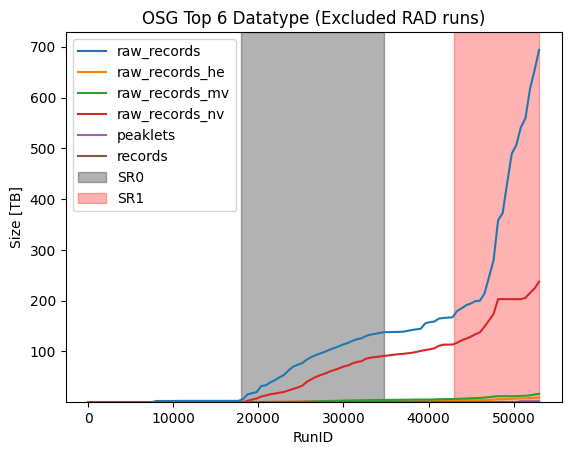

In [23]:
plt.figure(dpi=100)
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rr_norad, label='raw_records')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrhe_norad, label='raw_records_he')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrmv_norad, label='raw_records_mv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrnv_norad, label='raw_records_nv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_pkl_norad, label='peaklets')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_r_norad, label='records')
plt.xlabel('RunID')
plt.title('OSG Top 6 Datatype (Excluded RAD runs)')
plt.ylabel('Size [TB]')
plt.axvspan(sr0_left, sr0_right, alpha=0.3, color='k', label='SR0')
plt.axvspan(sr1_left, sr1_right, alpha=0.3, color='r', label='SR1')
#plt.yscale('log')
plt.gca().set_ylim(bottom=1)
plt.legend()

In [24]:
rules_info_lowq = find_with_tags(rules=rules_info, runs=runs, tags=['bad', 'messy', 'abandon'])

/tmp/jobs/28626149/ipykernel_197/2612685552.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tagged = np.zeros(len(rules), np.bool)


1346


In [25]:
cum_sizes_tb_rr_lowq = size_vs_runs(rules_info_lowq[(rules_info_lowq['data_type']=='raw_records')])
cum_sizes_tb_rrhe_lowq = size_vs_runs(rules_info_lowq[rules_info_lowq['data_type']=='raw_records_he'])
cum_sizes_tb_rrmv_lowq = size_vs_runs(rules_info_lowq[rules_info_lowq['data_type']=='raw_records_mv'])
cum_sizes_tb_rrnv_lowq = size_vs_runs(rules_info_lowq[rules_info_lowq['data_type']=='raw_records_nv'])
cum_sizes_tb_r_lowq = size_vs_runs(rules_info_lowq[rules_info_lowq['data_type']=='records'])

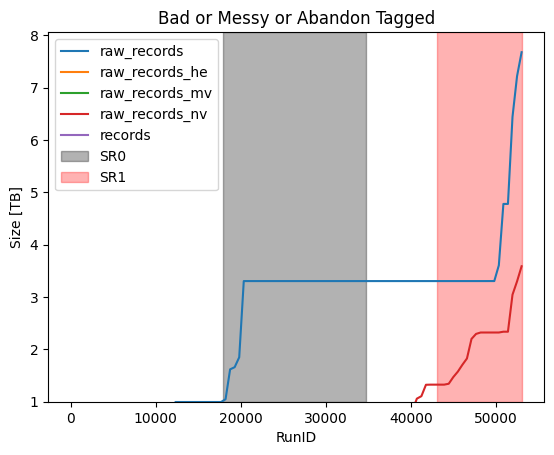

In [26]:
plt.figure(dpi=100)
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rr_lowq, label='raw_records')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrhe_lowq, label='raw_records_he')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrmv_lowq, label='raw_records_mv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrnv_lowq, label='raw_records_nv')
plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_r_lowq, label='records')
plt.xlabel('RunID')
plt.title('Bad or Messy or Abandon Tagged')
plt.ylabel('Size [TB]')
plt.axvspan(sr0_left, sr0_right, alpha=0.3, color='k', label='SR0')
plt.axvspan(sr1_left, sr1_right, alpha=0.3, color='r', label='SR1')
#plt.yscale('log')
plt.gca().set_ylim(bottom=1)
plt.legend()

In [38]:
rules_info_lowq['size_gb'].sum()

12195.533

In [39]:
np.save('delete_dcache_20230628/low_quality_tagged_raw_records.npy', rules_info_lowq)

In [42]:
cum_sizes_tb_rr_lowq[-1] + cum_sizes_tb_rrhe_lowq[-1] + cum_sizes_tb_rrmv_lowq[-1] + cum_sizes_tb_rrnv_lowq[-1] + cum_sizes_tb_r_lowq[-1]

11.73884622931632

### preSR0

In [27]:
pre_sr0_rules_info = rules_info_norad[rules_info_norad['runid'].astype(int)<sr0_left]

In [29]:
rules_info_norad['size_gb'].sum()

986668.5

In [30]:
pre_sr0_rules_info['size_gb'].sum()

7465.8306

In [40]:
np.save('delete_dcache_20230628/pre_sr0_rr_no_rad', pre_sr0_rules_info)

### All time

/tmp/jobs/28626149/ipykernel_197/3785401751.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_mode = np.zeros(len(rules), np.bool)


780


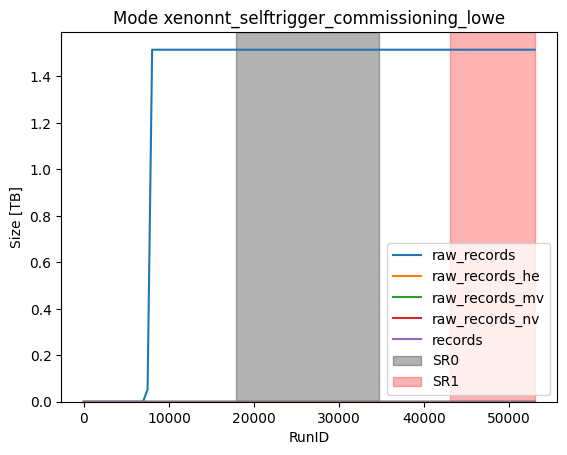

6570


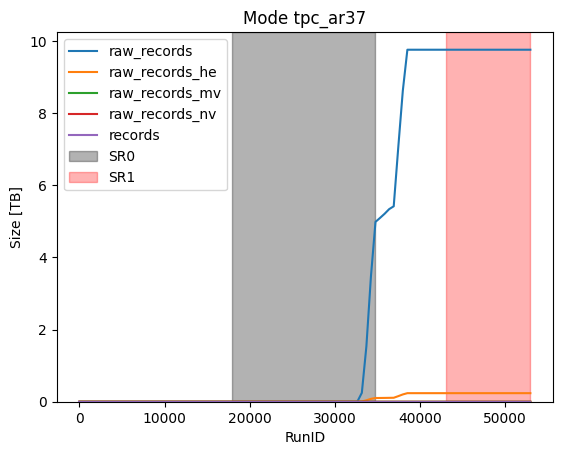

22985


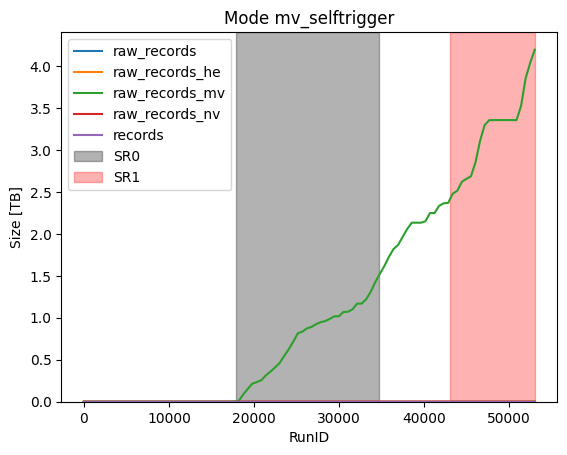

41614


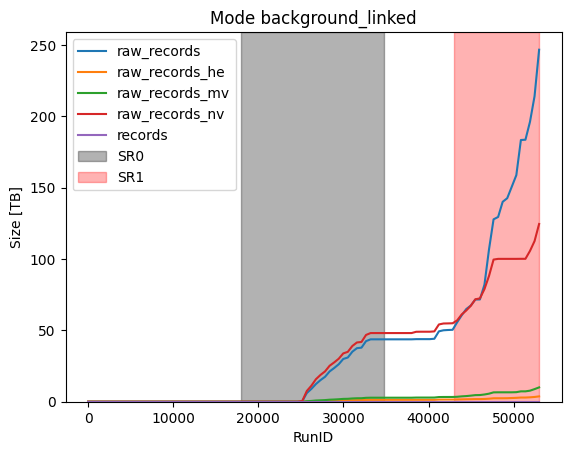

286


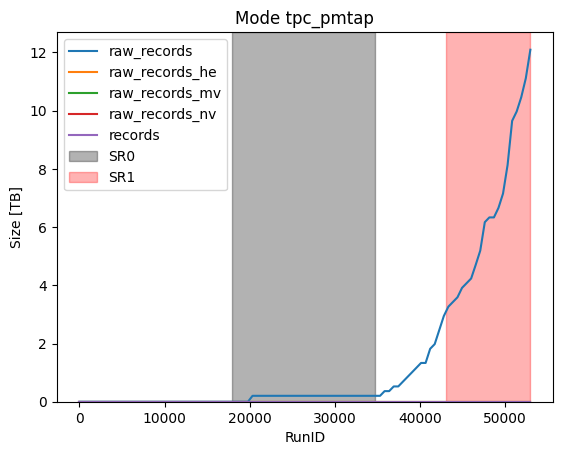

0
444


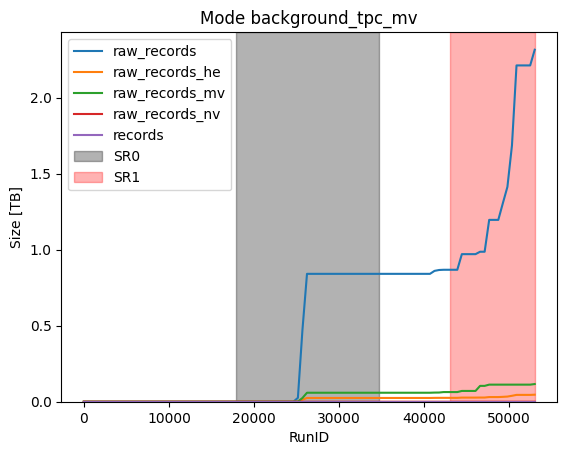

2233


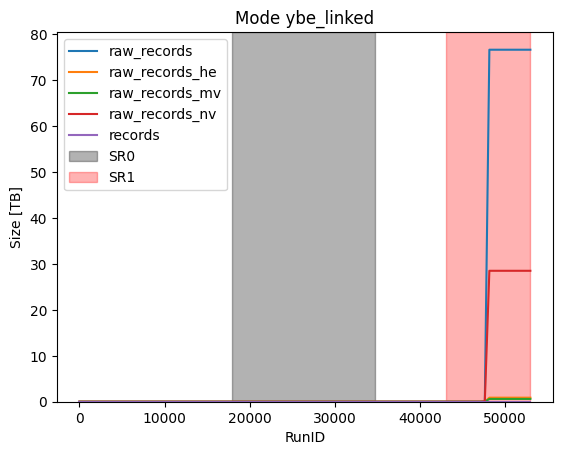

0
17


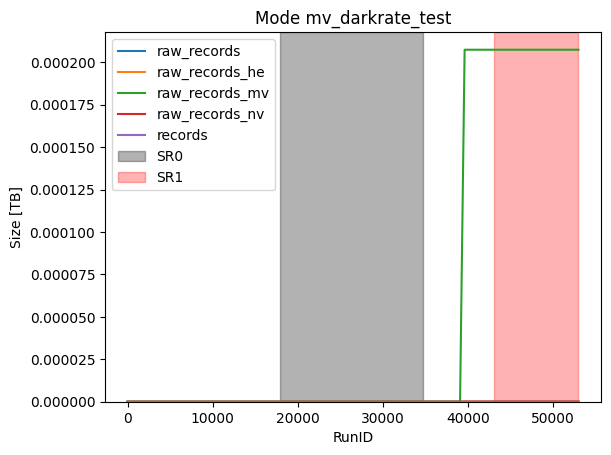

4


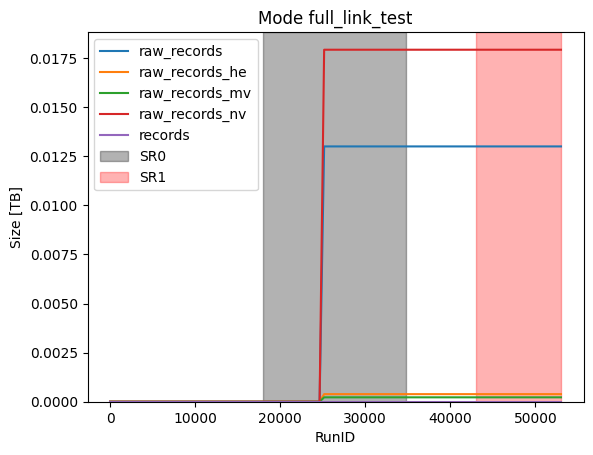

730


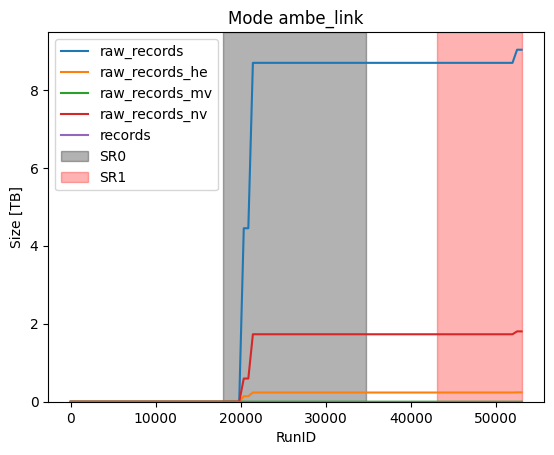

0
99


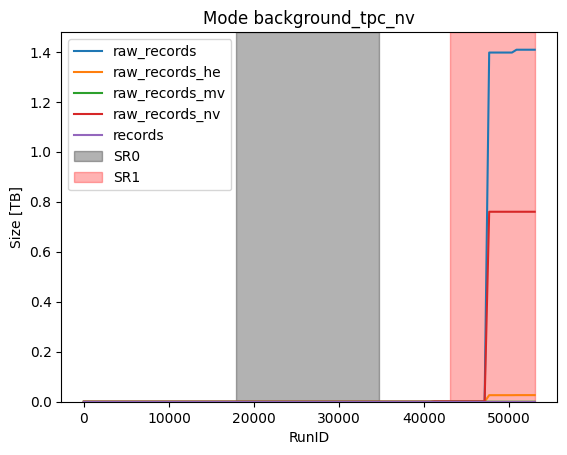

0
12


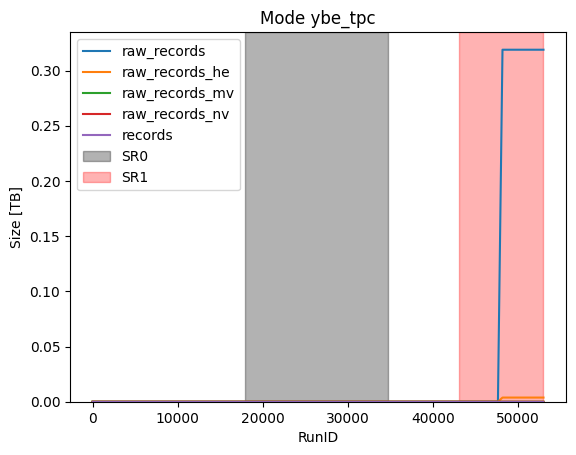

8


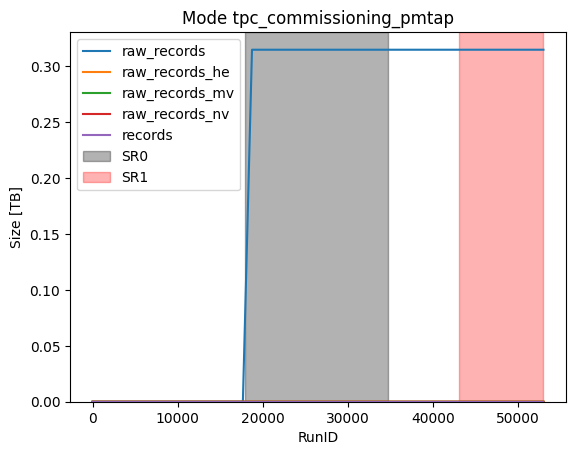

20


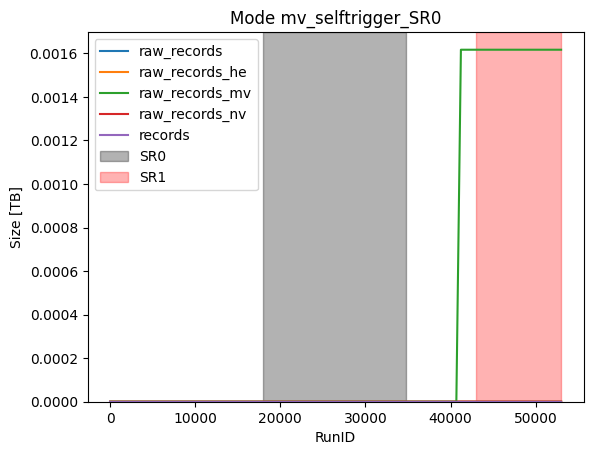

0
11


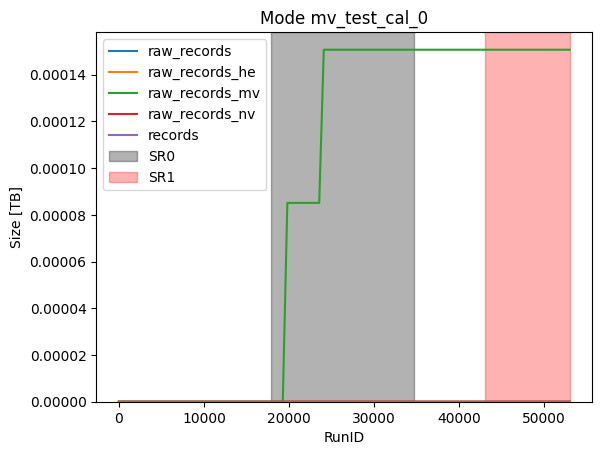

6171


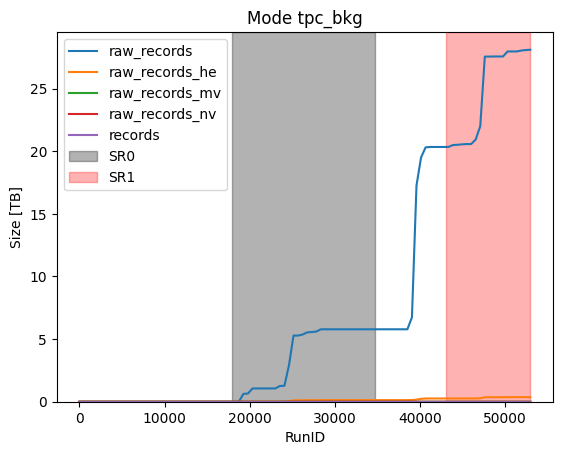

0
0
1619


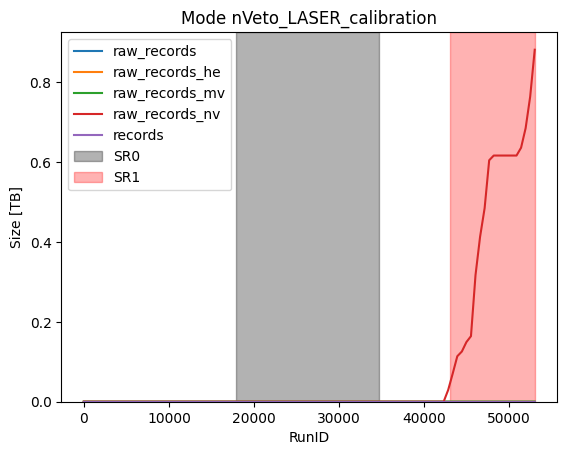

0
0
0
407


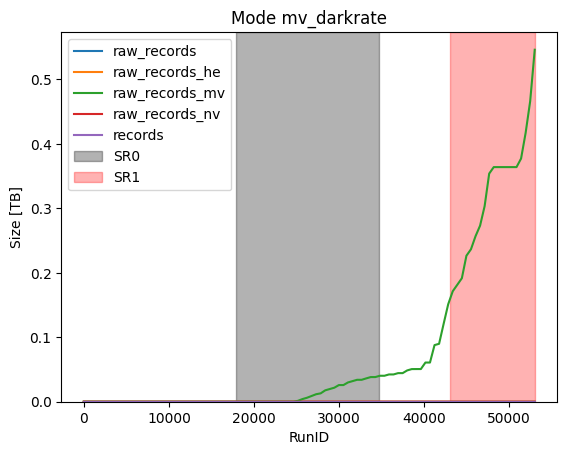

0
400


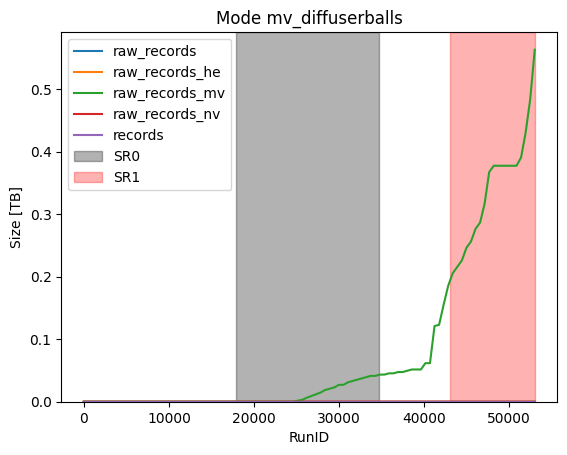

0
12


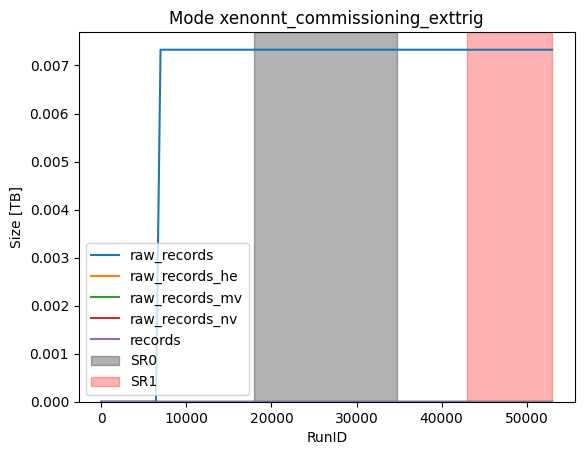

0
0
21


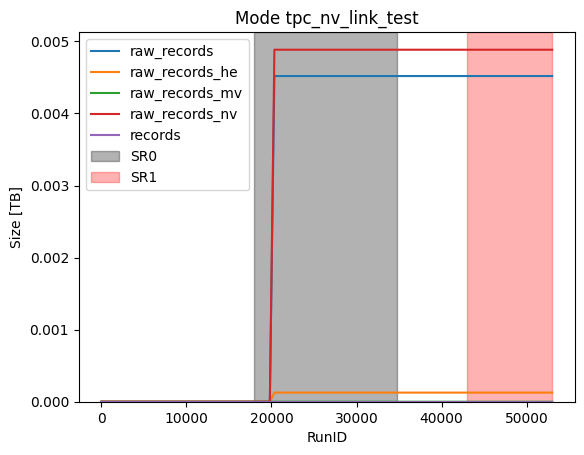

20


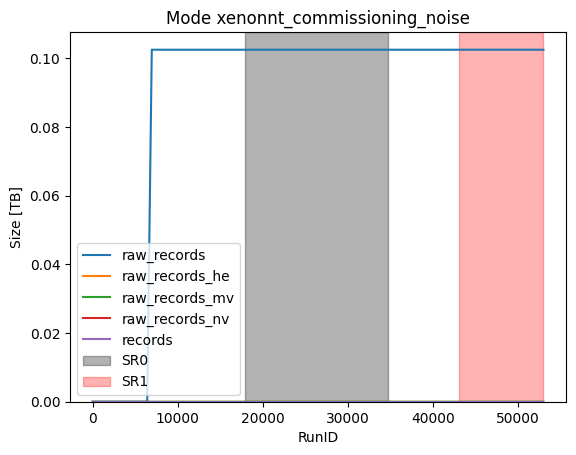

2661


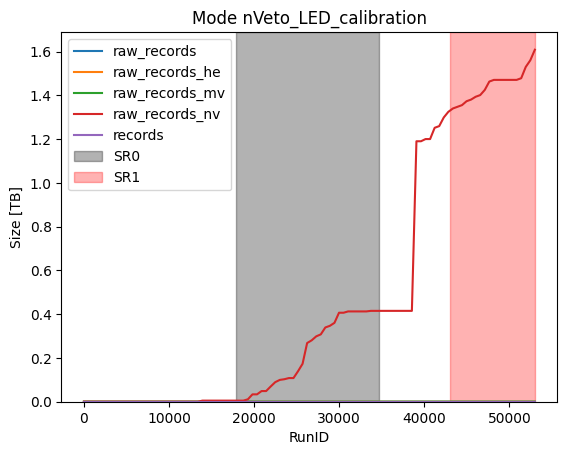

612


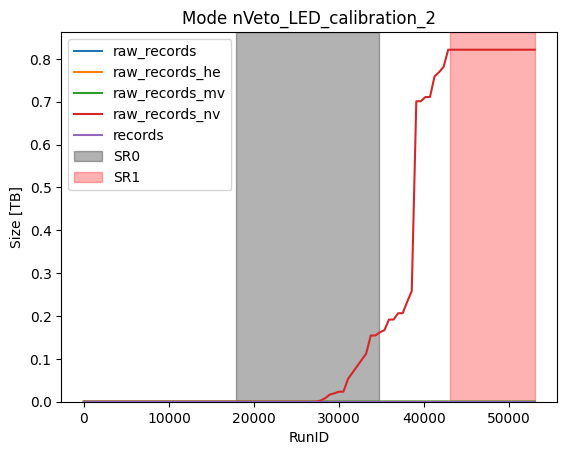

0
1165


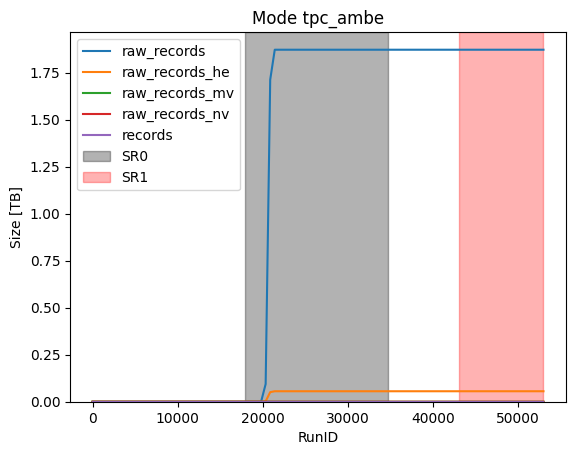

0
2073


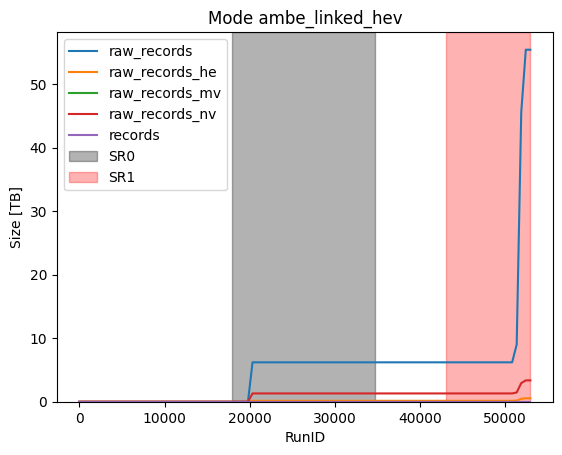

0
0
189


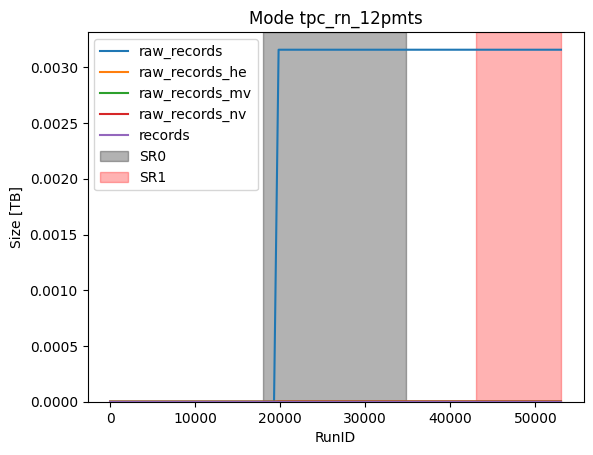

199


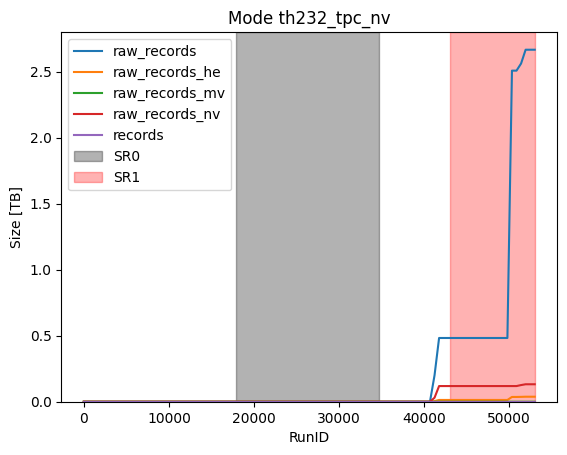

1
0
0
96


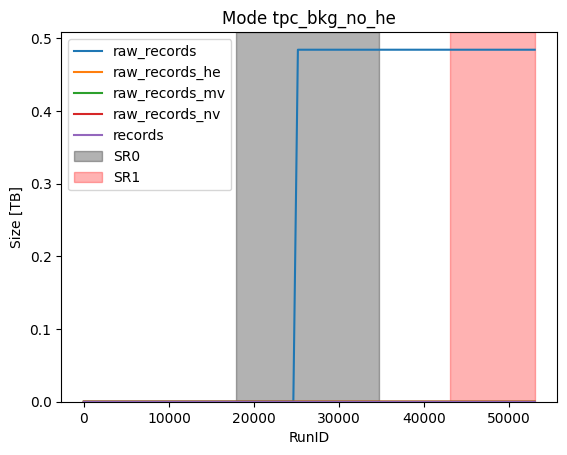

0
60


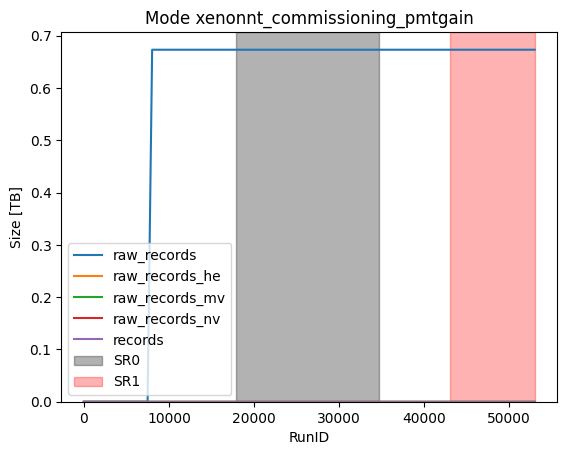

0
1228


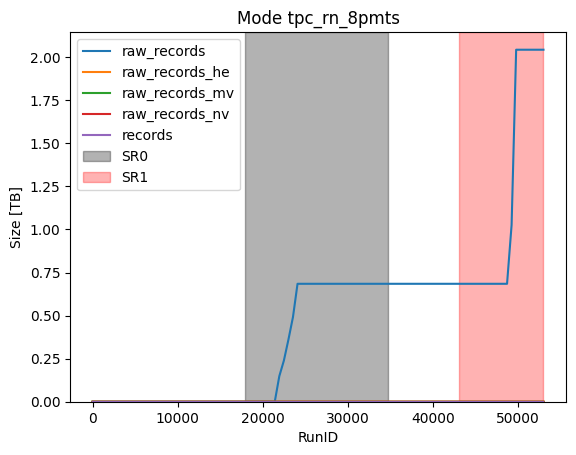

1583


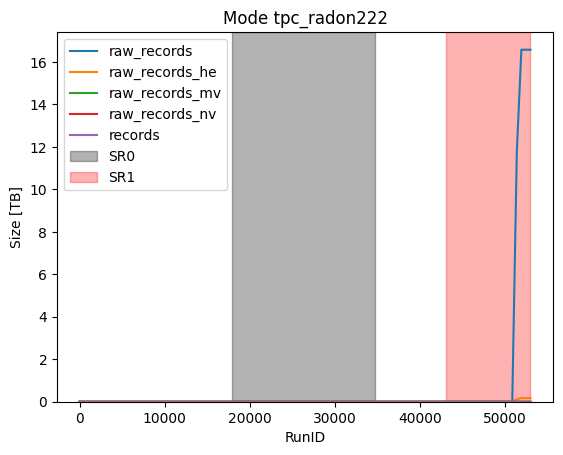

12232


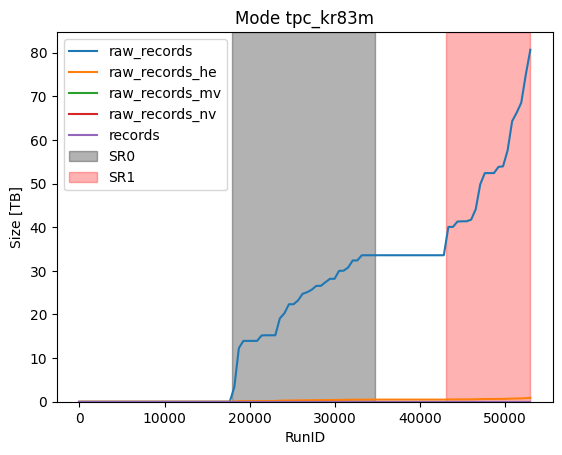

108


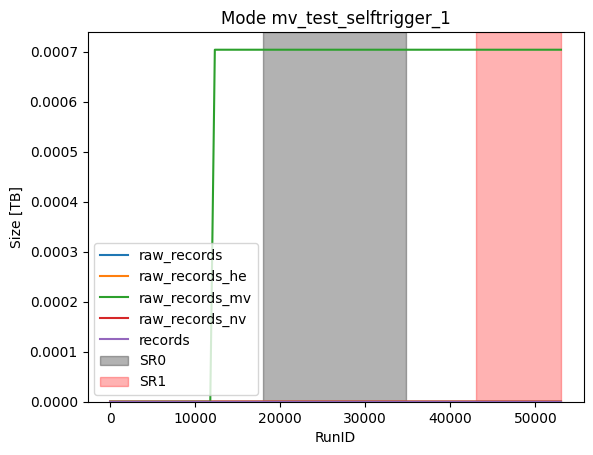

0
9


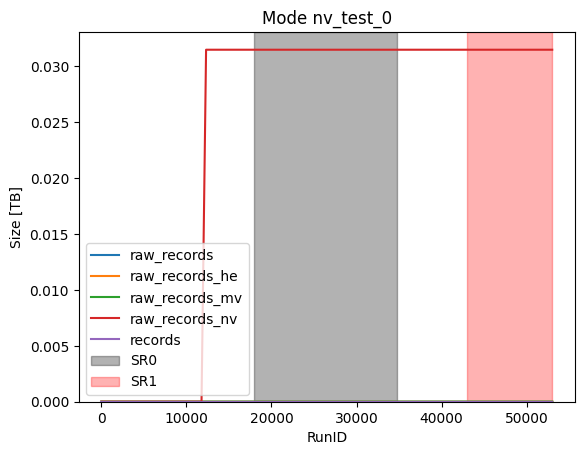

1


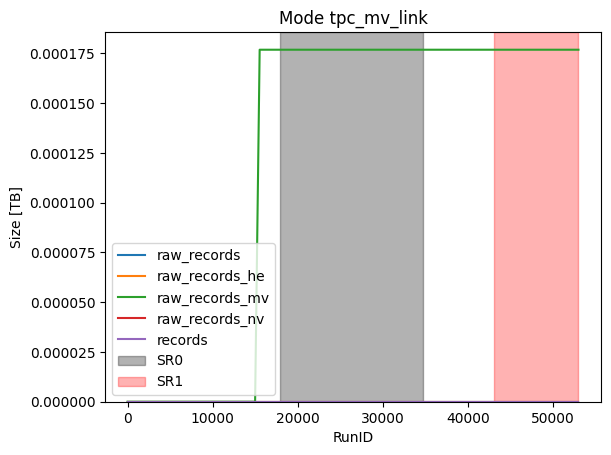

2888


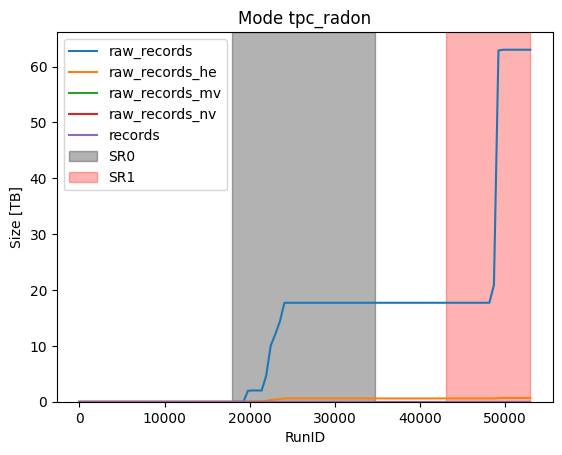

0
0
25979


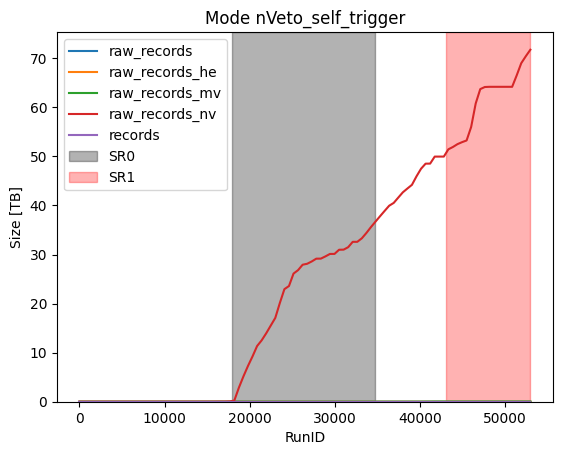

65
8


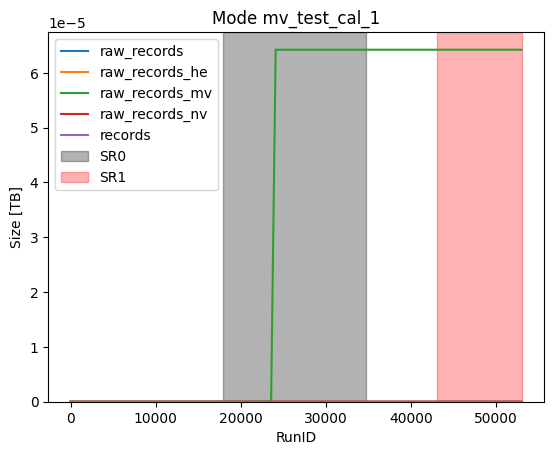

380


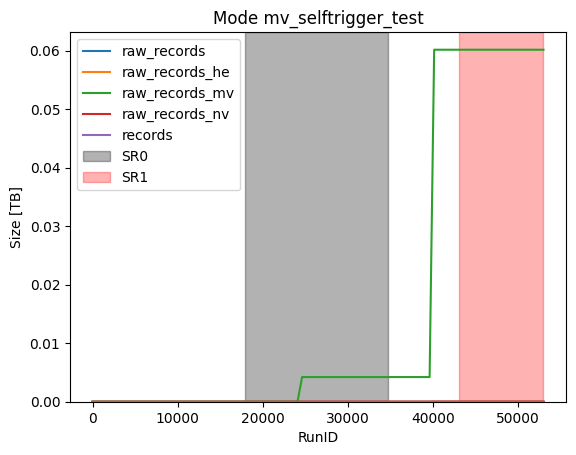

8300


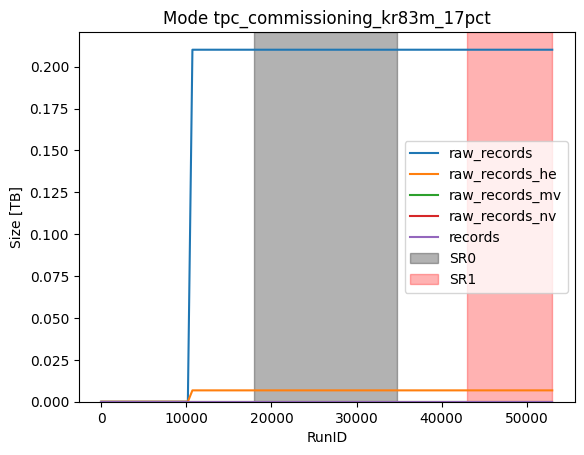

0
0
0
1303


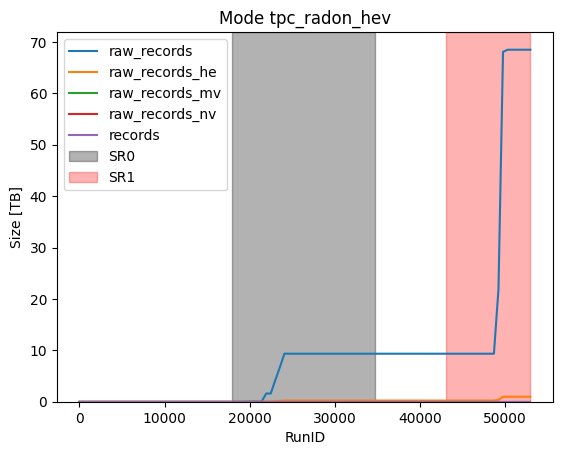

2028


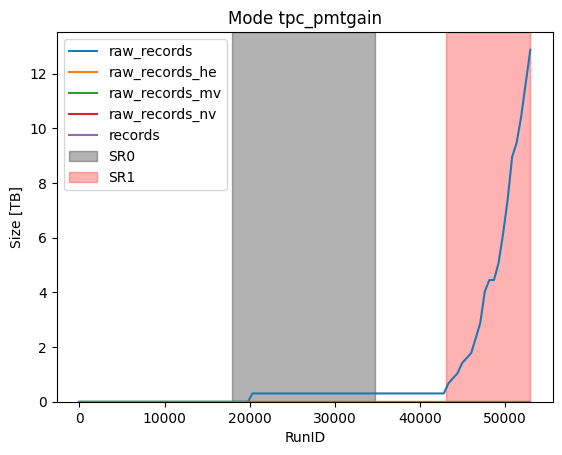

0
1238


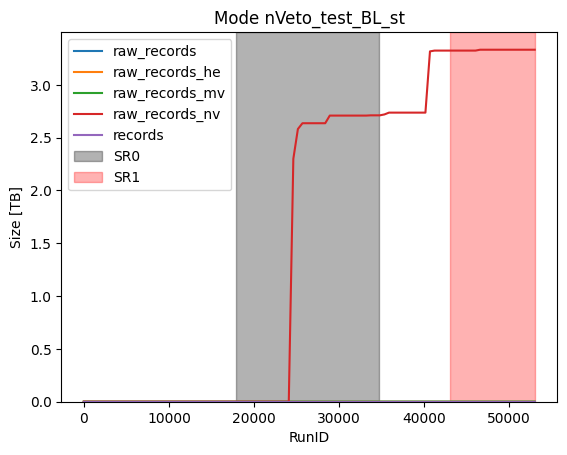

1


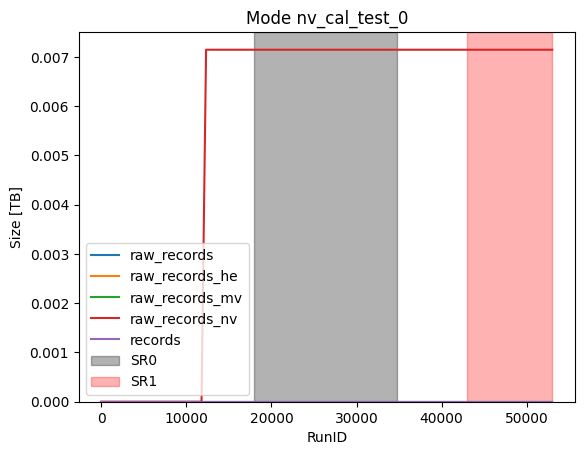

512


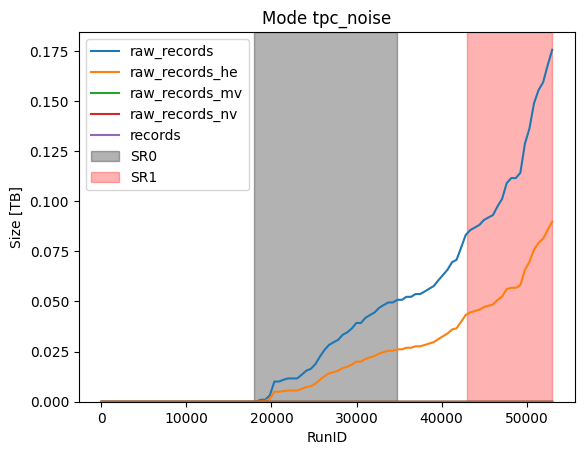

369


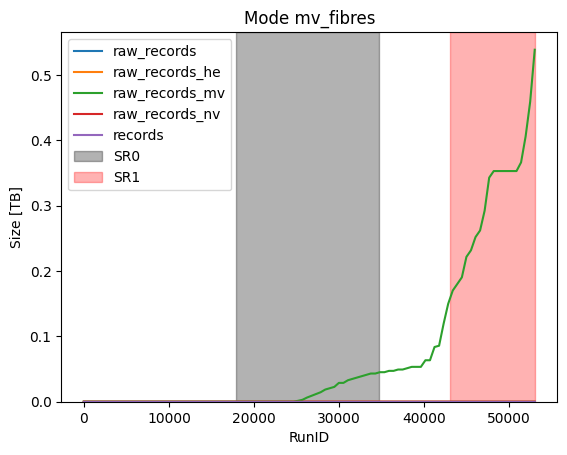

13
26


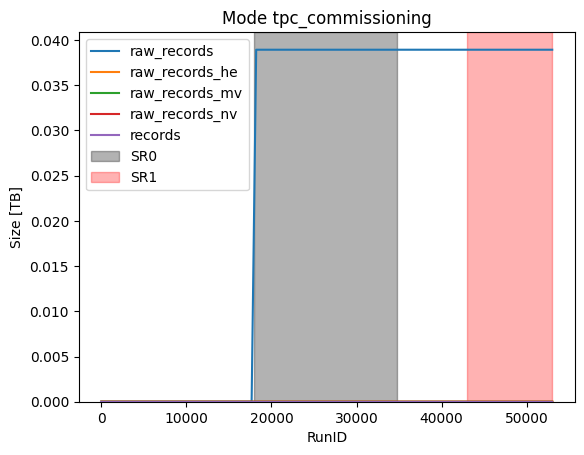

5


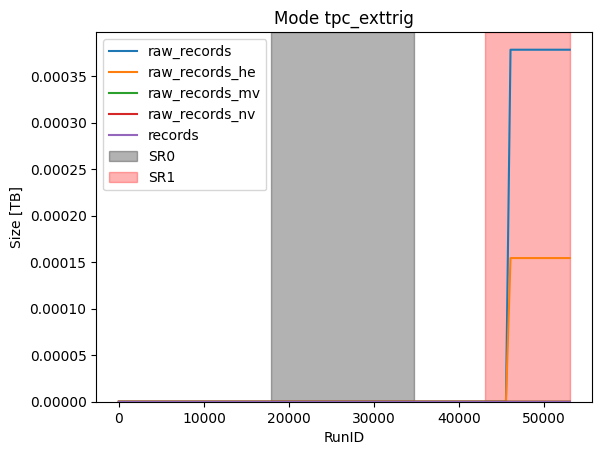

66


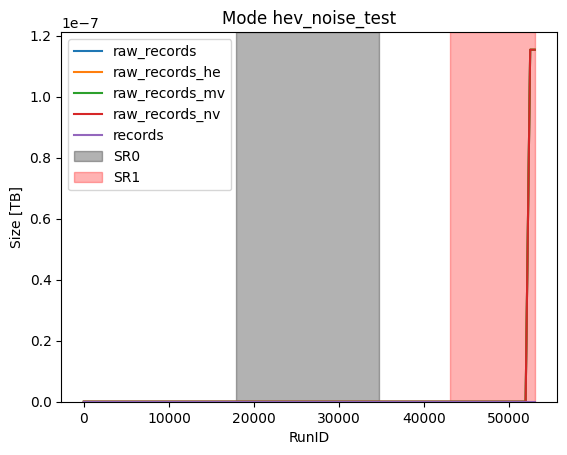

377
8
37


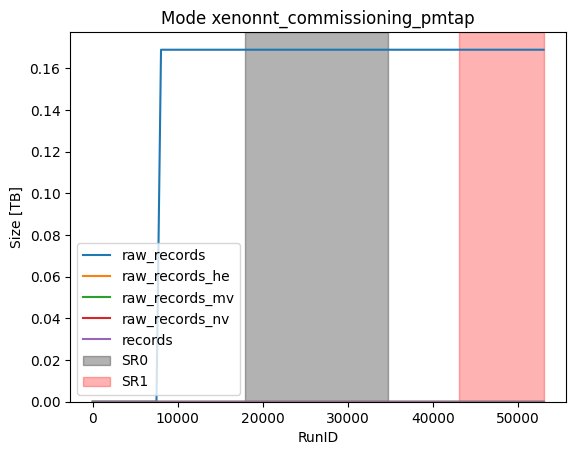

140


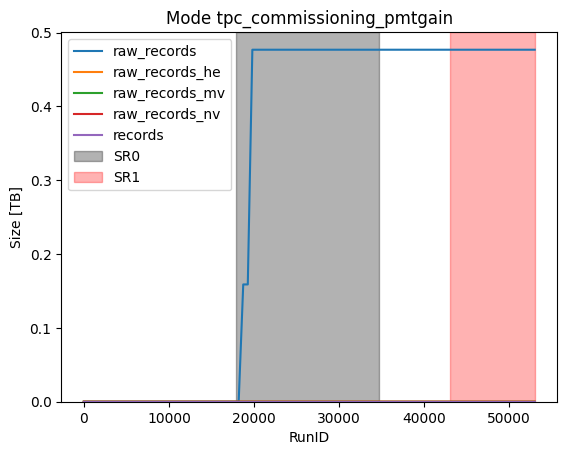

0
0
385


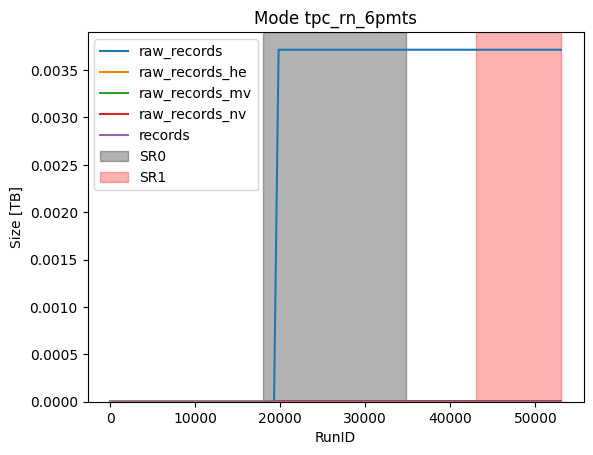

0
1


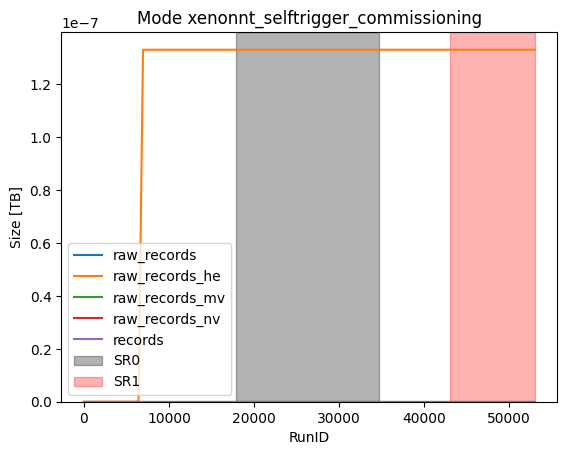

In [63]:
total_rr = 0
total_rrhe = 0
total_rrmv = 0
total_rrnv = 0
total_r = 0

size_rr = []
size_rrhe = []
size_rrmv = []
size_rrnv = []
size_r = []

for m in modes_list:
    rules_info_mode = find_with_mode(rules=rules_info_norad, runs=runs, mode=m)
    cum_sizes_tb_rr_mode = size_vs_runs(rules_info_mode[(rules_info_mode['data_type']=='raw_records')])
    cum_sizes_tb_rrhe_mode = size_vs_runs(rules_info_mode[rules_info_mode['data_type']=='raw_records_he'])
    cum_sizes_tb_rrmv_mode = size_vs_runs(rules_info_mode[rules_info_mode['data_type']=='raw_records_mv'])
    cum_sizes_tb_rrnv_mode = size_vs_runs(rules_info_mode[rules_info_mode['data_type']=='raw_records_nv'])
    cum_sizes_tb_r_mode = size_vs_runs(rules_info_mode[rules_info_mode['data_type']=='records'])

    # ybe nv
    if 'ybe' in m:
        to_save = rules_info_mode[rules_info_mode['data_type']=='raw_records_nv']
        np.save('delete_dcache_20230628/ybe_rr_nv.npy',to_save)
    
    if m=='tpc_pmtap':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_left)&
                                  (rules_info_mode['runid'].astype(int)<=sr1_left)]
        #to_save = to_save[np.where(np.isin(to_save['runid'], luisa_ap_list, invert=True))]
        #np.save('delete_dcache_20230628/pre_sr1_tpc_pmtap_rr.npy',to_save)
    if m=='tpc_pmtgain':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_left)&
                                  (rules_info_mode['runid'].astype(int)<=sr1_left)]
        #np.save('delete_dcache_20230628/pre_sr1_tpc_pmtgain_rr.npy',to_save)
    if m=='tpc_kr83m':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_right)&
                                  (rules_info_mode['runid'].astype(int)<=sr1_left)]
        #np.save('delete_dcache_20230628/post_sr0_pre_sr1_tpc_kr83m_rr.npy',to_save)
    if m=='tpc_kr83m':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_left)&
                                  (rules_info_mode['runid'].astype(int)<=sr0_right)]
        #np.save('delete_dcache_20230628/sr0_tpc_kr83m_rr.npy',to_save)
    if m=='tpc_radon':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_left)&
                                  (rules_info_mode['runid'].astype(int)<=sr0_right)]
        #np.save('delete_dcache_20230628/sr0_tpc_radon_rr.npy',to_save)
    if m=='tpc_radon_hev':
        to_save = rules_info_mode[(rules_info_mode['runid'].astype(int)>=sr0_left)&
                                  (rules_info_mode['runid'].astype(int)<=sr0_right)]
        #np.save('delete_dcache_20230628/sr0_tpc_radon_hev_rr.npy',to_save)
    
    total_rr += cum_sizes_tb_rr_mode[-1]
    total_rrhe += cum_sizes_tb_rrhe_mode[-1]
    total_rrmv += cum_sizes_tb_rrmv_mode[-1]
    total_rrnv += cum_sizes_tb_rrnv_mode[-1]
    total_r += cum_sizes_tb_r_mode[-1]
    
    size_rr.append(int(cum_sizes_tb_rr_mode[-1]))
    size_rrhe.append(int(cum_sizes_tb_rrhe_mode[-1]))
    size_rrmv.append(int(cum_sizes_tb_rrmv_mode[-1]))
    size_rrnv.append(int(cum_sizes_tb_rrnv_mode[-1]))
    size_r.append(int(cum_sizes_tb_r_mode[-1]))
    
    if (cum_sizes_tb_rr_mode[-1] + 
        cum_sizes_tb_rrhe_mode[-1] + 
        cum_sizes_tb_rrmv_mode[-1] + 
        cum_sizes_tb_rrnv_mode[-1] +
        cum_sizes_tb_r_mode[-1]) > 0:
    
        plt.figure(dpi=100)
        plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rr_mode, label='raw_records')
        plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrhe_mode, label='raw_records_he')
        plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrmv_mode, label='raw_records_mv')
        plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_rrnv_mode, label='raw_records_nv')
        plt.plot(np.linspace(0, sr1_right, 100), cum_sizes_tb_r_mode, label='records')
        plt.xlabel('RunID')
        plt.title('Mode %s'%(m))
        plt.ylabel('Size [TB]')
        plt.axvspan(sr0_left, sr0_right, alpha=0.3, color='k', label='SR0')
        plt.axvspan(sr1_left, sr1_right, alpha=0.3, color='r', label='SR1')
        #plt.yscale('log')
        plt.gca().set_ylim(bottom=0)
        plt.legend()
        plt.savefig('osg_straxdata_mode_%s'%(m))
        plt.show()

size_rr = np.array(size_rr)  
size_rrhe = np.array(size_rrhe)  
size_rrmv = np.array(size_rrmv)  
size_rrnv = np.array(size_rrnv)  
size_r = np.array(size_r)  

## Size by Run Mode

In [33]:
modes_list = np.array(modes_list)
print('\n raw_records')
for i in range(len(modes_list)):
    if size_rr[size_rr.argsort()][i] > 1:
        print(modes_list[size_rr.argsort()][i], size_rr[size_rr.argsort()][i], 'TB')
    
print('\n raw_records_he')
for i in range(len(modes_list)):
    if size_rrhe[size_rrhe.argsort()][i] > 1:
        print(modes_list[size_rrhe.argsort()][i], size_rrhe[size_rrhe.argsort()][i], 'TB')
        
print('\n records')
for i in range(len(modes_list)):
    if size_r[size_r.argsort()][i] > 1:
        print(modes_list[size_r.argsort()][i], size_r[size_r.argsort()][i], 'TB')

print('\n raw_records_nv')
for i in range(len(modes_list)):
    if size_rrnv[size_rrnv.argsort()][i] > 1:
        print(modes_list[size_rrnv.argsort()][i], size_rrnv[size_rrnv.argsort()][i], 'TB')

print('\n raw_records_mv')
for i in range(len(modes_list)):
    if size_rrmv[size_rrmv.argsort()][i] > 1:
        print(modes_list[size_rrmv.argsort()][i], size_rrmv[size_rrmv.argsort()][i], 'TB')


 raw_records
background_tpc_mv 2 TB
tpc_rn_8pmts 2 TB
th232_tpc_nv 2 TB
ambe_link 9 TB
tpc_ar37 9 TB
tpc_pmtgain 12 TB
tpc_pmtap 12 TB
tpc_radon222 16 TB
tpc_bkg 28 TB
ambe_linked_hev 55 TB
tpc_radon 63 TB
tpc_radon_hev 68 TB
ybe_linked 76 TB
tpc_kr83m 80 TB
background_linked 246 TB

 raw_records_he
background_linked 3 TB

 records

 raw_records_nv
nVeto_test_BL_st 3 TB
ambe_linked_hev 3 TB
ybe_linked 28 TB
nVeto_self_trigger 71 TB
background_linked 124 TB

 raw_records_mv
mv_selftrigger 4 TB
background_linked 10 TB


## Size by Run

In [34]:
presr0 = rules_info[(rules_info['runid'].astype(int)<sr0_left)]['size_gb'].sum()/1024
print('Beofre SR0:', int(presr0), 'TB')
sr0 = rules_info[(rules_info['runid'].astype(int)<sr0_right)&(rules_info['runid'].astype(int)>sr0_left)]['size_gb'].sum()/1024
print('During SR0:', int(sr0), 'TB')
btwn = rules_info[(rules_info['runid'].astype(int)<sr1_left)&(rules_info['runid'].astype(int)>sr0_right)]['size_gb'].sum()/1024
print('Between SR0 and SR1:', int(btwn), 'TB')
sr1 = rules_info[(rules_info['runid'].astype(int)>sr1_left)]['size_gb'].sum()/1024
print('Between SR0 and SR1:', int(sr1), 'TB')

Beofre SR0: 48 TB
During SR0: 233 TB
Between SR0 and SR1: 74 TB
Between SR0 and SR1: 668 TB


# To delete

## Pre-SR0 non RAD

In [38]:
pre_sr0_rr_no_rad = np.load('delete_dcache_20230628/pre_sr0_rr_no_rad.npy', allow_pickle=True)

## Bad Quality

In [42]:
low_quality_tagged_rr = np.load('delete_dcache_20230628/low_quality_tagged_raw_records.npy', allow_pickle=True)

## SR0 NV

In [50]:
sr0_rr_nv = rules_info[((rules_info['data_type']=="raw_records_nv")&
                        (rules_info['runid'].astype(np.int32)<=sr0_right))]

In [51]:
np.save('delete_dcache_20230628/sr0_rr_nv.npy', sr0_rr_nv)

In [55]:
sr0_rr_nv = np.load('delete_dcache_20230628/sr0_rr_nv.npy', allow_pickle=True)

## SR0 MV

In [70]:
sr0_rr_mv = rules_info[((rules_info['data_type']=="raw_records_mv")&
                        (rules_info['runid'].astype(np.int32)<=sr0_right))]

In [71]:
np.save('delete_dcache_20230628/sr0_rr_mv.npy', sr0_rr_mv)

In [72]:
sr0_rr_mv = np.load('delete_dcache_20230628/sr0_rr_mv.npy', allow_pickle=True)

## YBe NV

In [64]:
ybe_rr_nv = np.load('delete_dcache_20230628/ybe_rr_nv.npy', allow_pickle=True)

## Overall

In [73]:
overall = np.concatenate((pre_sr0_rr_no_rad, low_quality_tagged_rr, sr0_rr_nv, sr0_rr_mv, ybe_rr_nv))

In [74]:
overall = np.unique(overall)

In [75]:
np.sum(overall['size_gb'])/1024

113.12670135498047

In [76]:
np.save('delete_dcache_20230628/osg_20230628.npy', overall)